In [391]:
from matplotlib import pyplot as plt
import pandas as pd

columns=['Position', 'Speed', 'Acceleration', 'Time', 'Started']

# Load .log file
with open('./arduino/putty.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    lines = lines[2:-1]

    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)



In [392]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

df.head()

,Position,Speed,Acceleration,Time,Started
0,0,0.0,0.0,2059148,0
1,0,0.0,0.0,2060480,0
2,0,0.0,0.0,2061804,0
3,0,0.0,0.0,2063120,0
4,0,0.0,0.0,2064452,0


In [393]:
df.tail()

,Position,Speed,Acceleration,Time,Started
5981,0,0.0,0.0,15342252,1
5982,0,0.0,0.0,15344292,1
5983,0,0.0,0.0,15346332,1
5984,0,0.0,0.0,15348372,1
5985,0,0.0,0.0,15350412,1


In [394]:
df = df[:-3]
df.tail()

,Position,Speed,Acceleration,Time,Started
5978,0,0.0,0.0,15336132,1
5979,0,0.0,0.0,15338172,1
5980,0,0.0,0.0,15340212,1
5981,0,0.0,0.0,15342252,1
5982,0,0.0,0.0,15344292,1


In [395]:
# Calculate angle from position
df['Angle'] = df['Position'].apply(lambda x: x * 360 / 1600)
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Time'] = df['Time'] - df['Time'].min() / 1000000
df['Acceleration'] = df['Speed'].diff() / df['Time'].diff()
df.head()

,Position,Speed,Acceleration,Time,Started,Angle,Radian
0,0,0.0,NaN,2.059146e+06,0,0.0,0.0
1,0,0.0,0.0,2.060478e+06,0,0.0,0.0
2,0,0.0,0.0,2.061802e+06,0,0.0,0.0
3,0,0.0,0.0,2.063118e+06,0,0.0,0.0
4,0,0.0,0.0,2.064450e+06,0,0.0,0.0


In [396]:
# move time column to the end
df = df[['Position', 'Angle', 'Radian', 'Speed', 'Acceleration', 'Time']]
df.head()

,Position,Angle,Radian,Speed,Acceleration,Time
0,0,0.0,0.0,0.0,NaN,2.059146e+06
1,0,0.0,0.0,0.0,0.0,2.060478e+06
2,0,0.0,0.0,0.0,0.0,2.061802e+06
3,0,0.0,0.0,0.0,0.0,2.063118e+06
4,0,0.0,0.0,0.0,0.0,2.064450e+06


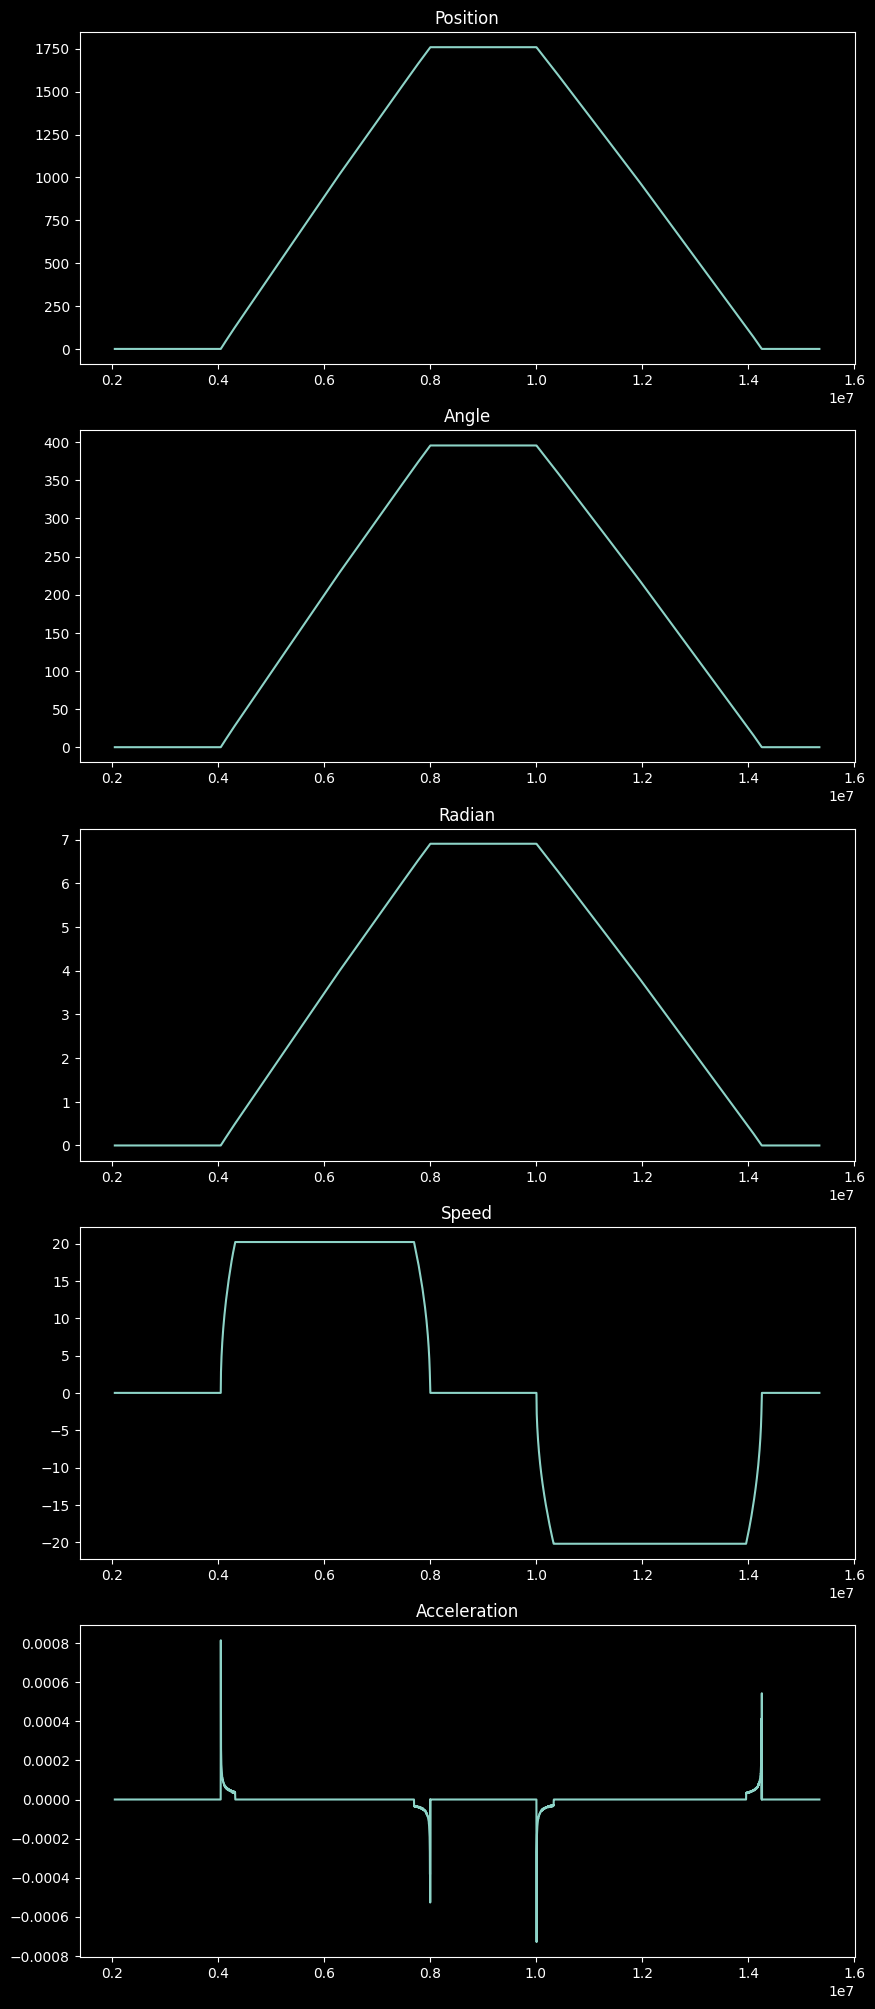

In [397]:
# Plot
columns = df.columns.tolist()
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

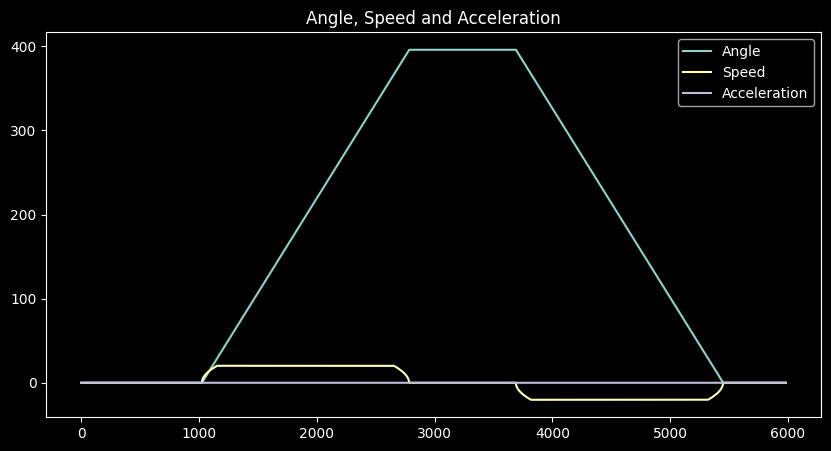

In [398]:
# On the same plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Angle'].plot(ax=ax)
df['Speed'].plot(ax=ax)
df['Acceleration'].plot(ax=ax)

# Add legend and set title
ax.legend(['Angle', 'Speed', 'Acceleration'])
ax.set_title('Angle, Speed and Acceleration')

plt.show()

In [42]:
from matplotlib import pyplot as plt
import pandas as pd

# Load .log file
with open('./arduino/experiment.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    columns = lines[2].split(',')
    columns = [c.strip() for c in columns]
    lines = lines[6:-1]
    
    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)

In [43]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

# df[1100:1105]
df.tail()

,Raw Input,Angle,Time,Started
4468,78,6.86,11588443.0,0
4469,78,6.86,11590135.0,1
4470,78,6.86,11591831.0,0
4471,78,6.86,11593506.0,0
4472,78,6.86,11595187.0,0


In [44]:
df['Time'] = df['Time'] / 1000000
df.head()

,Raw Input,Angle,Time,Started
0,76,6.68,4.154620,0
1,76,6.68,4.156251,0
2,76,6.68,4.157888,0
3,76,6.68,4.159514,0
4,76,6.68,4.161151,0


In [45]:
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Angular Velocity'] = df['Radian'].diff() / df['Time'].diff()

y_columns = ['Time', 'Started']

columns = df.columns.tolist()
columns = [c for c in columns if c not in y_columns] + y_columns
df = df[columns]

df[1100:1105]

,Raw Input,Angle,Radian,Angular Velocity,Time,Started
1100,1144,100.75,1.758418,-15.085437,6.034426,1
1101,1126,99.25,1.732238,-14.305965,6.036256,1
1102,1109,97.67,1.704662,-15.544633,6.038030,1
1103,1092,96.18,1.678656,-14.568843,6.039815,1
1104,1073,94.59,1.650906,-15.599051,6.041594,1


In [46]:
columns = ['Raw Input', 'Angle', 'Radian', 'Angular Velocity', 'Started', 'Time']
df = df[columns]
df.head()

,Raw Input,Angle,Radian,Angular Velocity,Started,Time
0,76,6.68,0.116588,NaN,0,4.154620
1,76,6.68,0.116588,0.0,0,4.156251
2,76,6.68,0.116588,0.0,0,4.157888
3,76,6.68,0.116588,0.0,0,4.159514
4,76,6.68,0.116588,0.0,0,4.161151


In [47]:
# cut off at 4 seconds
df = df[df['Time'] > 1]

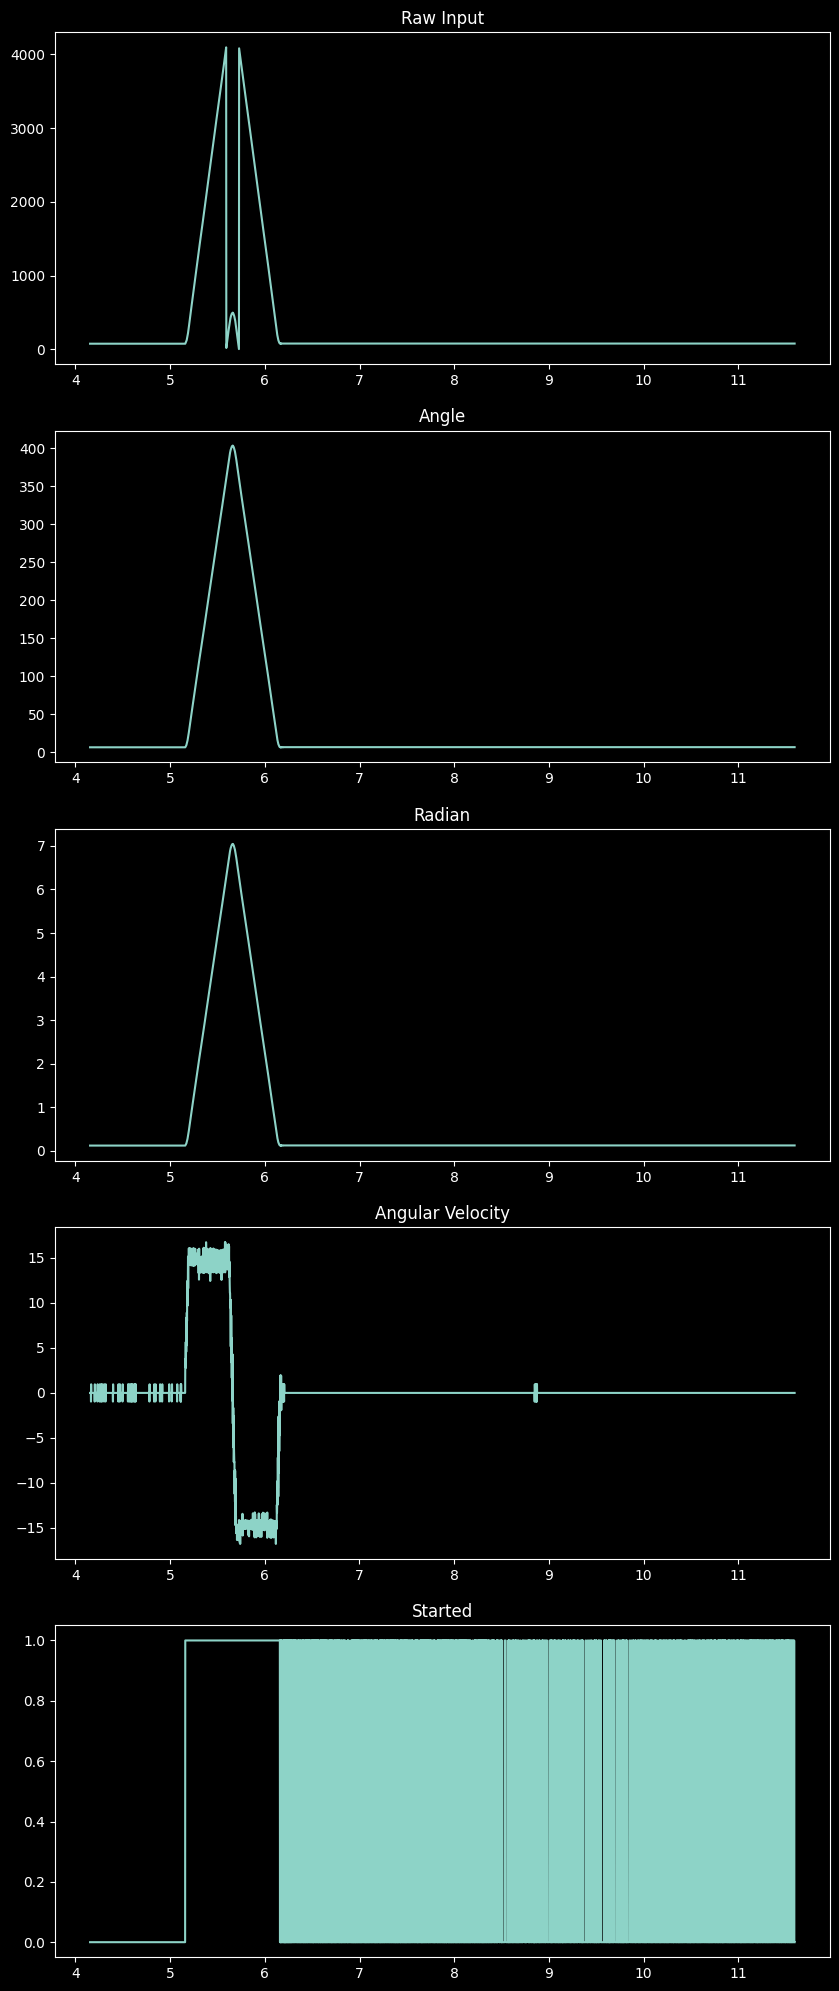

In [48]:
# Plot
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

In [49]:
import numpy as np
from scipy.signal import butter, filtfilt

dfCopy = df.copy()
dfCopy['Time'] = dfCopy['Time'] - dfCopy['Time'].min()

# Calculate angular velocity
dfCopy['Angular Velocity'] = dfCopy['Radian'].diff() / dfCopy['Time'].diff()
dfCopy['Angular Velocity'] = dfCopy['Angular Velocity'].fillna(0)

# Apply low pass filter
dfCopy['Angular Velocity Filtered'] = dfCopy['Angular Velocity'].rolling(window=10).mean()
dfCopy[600:605]

,Raw Input,Angle,Radian,Angular Velocity,Started,Time,Angular Velocity Filtered
600,75,6.68,0.116588,0.0,0,0.979278,0.0
601,76,6.68,0.116588,0.0,0,0.980908,0.0
602,76,6.68,0.116588,0.0,0,0.982543,0.0
603,76,6.68,0.116588,0.0,0,0.984171,0.0
604,76,6.68,0.116588,0.0,0,0.985805,0.0


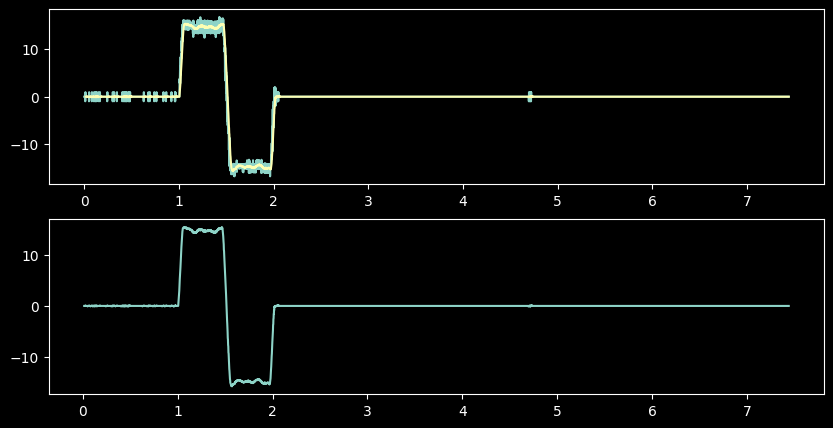

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity'])
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])
ax[1].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])